In [19]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


In [20]:
#Load Dataset
df = pd.read_csv("Bengaluru Ola.csv")

df.head()


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for Cancelling by Customer,Cancelled Rides by Driver,Reason for Cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Payment Method,Ride Distance,Driver Ratings,Customer Rating
0,28/01/2024,6:00:00,CNR1721175,Success,329258,Auto,Area-3,Area-2,5.42,18.46,...,NaN,0,NaN,0,NaN,868.06,Wallet,28.5,4.4,4.4
1,26/01/2024,3:00:00,CNR2871422,Cancelled by Driver,201414,Mini,Area-7,Area-6,NaN,NaN,...,NaN,1,The customer was coughing/sick,0,NaN,NaN,NaN,NaN,NaN,NaN
2,15/01/2024,16:00:00,CNR6875935,Cancelled by Driver,301629,Bike,Area-40,Area-24,NaN,NaN,...,NaN,1,Personal & Car related issues,0,NaN,NaN,NaN,NaN,NaN,NaN
3,02/01/2024,22:00:00,CNR6798834,Cancelled by Driver,319684,Prime Sedan,Area-11,Area-24,NaN,NaN,...,NaN,1,The customer was coughing/sick,0,NaN,NaN,NaN,NaN,NaN,NaN
4,30/01/2024,22:00:00,CNR9661713,Incomplete,330283,Bike,Area-41,Area-45,NaN,NaN,...,NaN,0,NaN,1,Other Issue,NaN,NaN,NaN,NaN,NaN


In [21]:
#Basic Dataset Info
df.shape


(49999, 21)

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               49999 non-null  object 
 1   Time                               49999 non-null  object 
 2   Booking ID                         49999 non-null  object 
 3   Booking Status                     49999 non-null  object 
 4   Customer ID                        49999 non-null  int64  
 5   Vehicle Type                       49999 non-null  object 
 6   Pickup Location                    49999 non-null  object 
 7   Drop Location                      49999 non-null  object 
 8   Avg VTAT                           33484 non-null  float64
 9   Avg CTAT                           33484 non-null  float64
 10  Cancelled  by Customer             49999 non-null  int64  
 11  Reason for Cancelling by Customer  3799 non-null   obj

In [23]:
df.describe()


,Customer ID,Avg VTAT,Avg CTAT,Cancelled by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,49999.000000,33484.000000,33484.000000,49999.000000,49999.000000,49999.000000,33484.000000,33484.000000,33484.00000,33484.000000
mean,550979.937539,10.481654,15.564320,0.075982,0.192204,0.062121,1023.374286,25.447143,4.00304,4.001726
std,258855.930945,5.490853,8.365313,0.264971,0.394036,0.241378,563.595072,14.175953,0.57968,0.579177
min,100001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,50.100000,1.000000,3.00000,3.000000
25%,328740.500000,5.730000,8.310000,0.000000,0.000000,0.000000,532.942500,13.100000,3.50000,3.500000
50%,552598.000000,10.460000,15.610000,0.000000,0.000000,0.000000,1023.350000,25.460000,4.00000,4.000000
75%,773970.000000,15.240000,22.790000,0.000000,0.000000,0.000000,1514.677500,37.670000,4.50000,4.500000
max,999991.000000,20.000000,30.000000,1.000000,1.000000,1.000000,2000.000000,50.000000,5.00000,5.000000


In [24]:
#Remove Duplicates
df.drop_duplicates(inplace=True)


In [25]:
#Convert Date & Time
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Hour'] = pd.to_datetime(df['Time']).dt.hour


/tmp/ipython-input-3767248066.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


In [26]:
#Handle Missing Values
df[['Avg VTAT','Avg CTAT']] = df[['Avg VTAT','Avg CTAT']].fillna(0)


In [27]:
#Create Important Flags
df['Is_Cancelled'] = df['Booking Status'].apply(
    lambda x: 1 if 'Cancel' in x else 0
)

df['Is_Completed'] = df['Booking Status'].apply(
    lambda x: 1 if x == 'Success' else 0
)


In [9]:
#Total Rides
total_rides = df.shape[0]
total_rides


49999

In [10]:
#Cancellation Rate
cancel_rate = (df['Is_Cancelled'].sum() / total_rides) * 100
cancel_rate


np.float64(26.818536370727415)

In [11]:
#Total Revenue
total_revenue = df['Booking Value'].sum()
total_revenue


np.float64(34266664.589999996)

In [28]:
#Revenue by Vehicle Type
revenue_vehicle = df.groupby('Vehicle Type')['Booking Value'].sum().sort_values(ascending=False)
revenue_vehicle


,Booking Value
Vehicle Type,
Bike,4957790.69
Prime Sedan,4919408.86
Prime Plus,4906974.66
eBike,4886694.02
Prime SUV,4884966.98
Auto,4870612.58
Mini,4840216.80


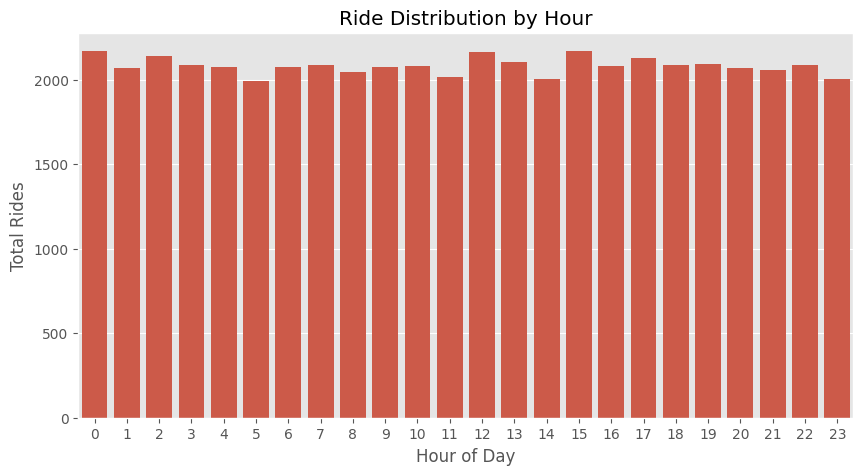

In [29]:
#Rides by Hour
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df)
plt.title("Ride Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Rides")
plt.show()


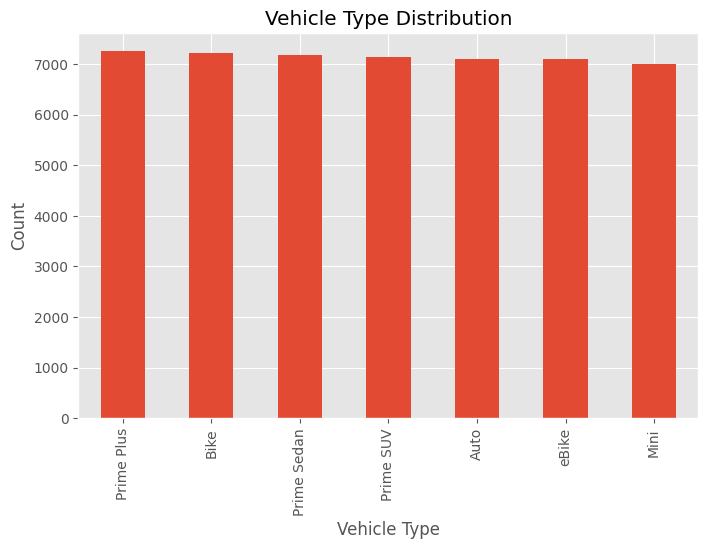

In [30]:
#Vehicle Type Distribution
plt.figure(figsize=(8,5))
df['Vehicle Type'].value_counts().plot(kind='bar')
plt.title("Vehicle Type Distribution")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()


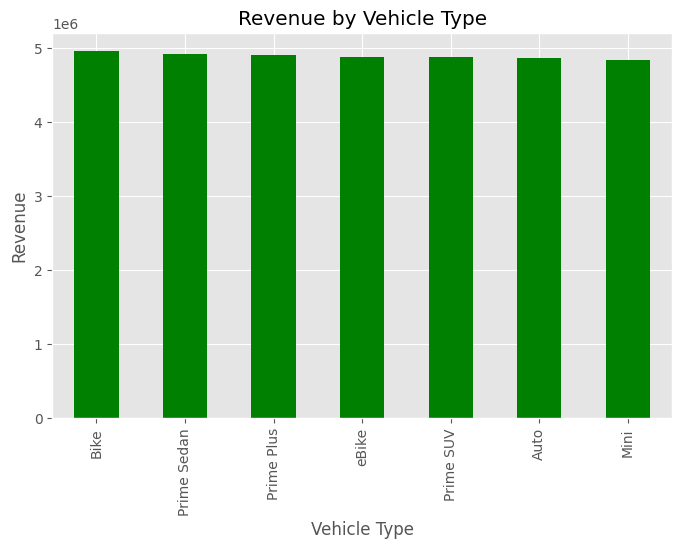

In [31]:
#Revenue by Vehicle Type
plt.figure(figsize=(8,5))
revenue_vehicle.plot(kind='bar', color='green')
plt.title("Revenue by Vehicle Type")
plt.ylabel("Revenue")
plt.show()


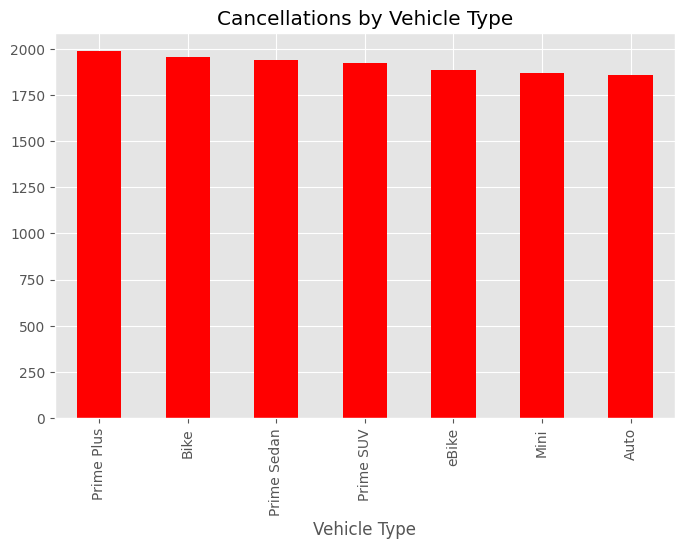

In [32]:
#Cancellation by Vehicle type
cancel_data = df[df['Is_Cancelled'] == 1]

plt.figure(figsize=(8,5))
cancel_data['Vehicle Type'].value_counts().plot(kind='bar', color='red')
plt.title("Cancellations by Vehicle Type")
plt.show()


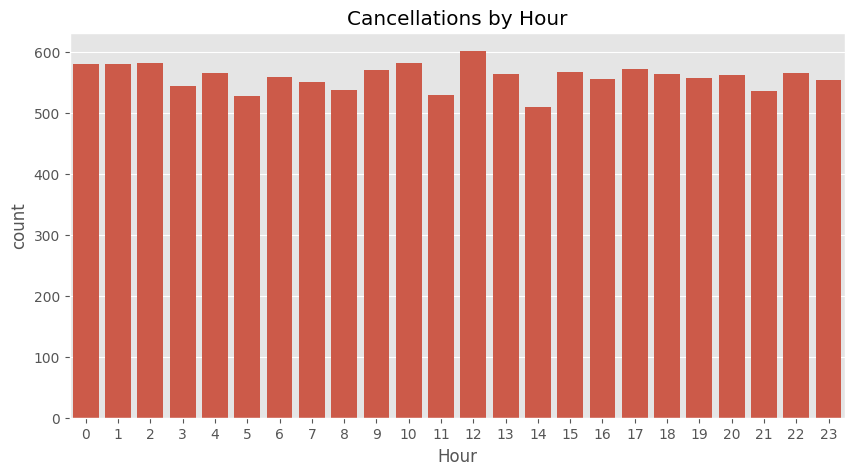

In [33]:
# Cancellation by Hour
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=cancel_data)
plt.title("Cancellations by Hour")
plt.show()


In [34]:
#Key Business Insights
print("Total Rides:", total_rides)
print("Cancellation Rate:", round(cancel_rate,2), "%")
print("Highest Revenue Vehicle:", revenue_vehicle.idxmax())


Total Rides: 49999
Cancellation Rate: 26.82 %
Highest Revenue Vehicle: Bike


In [35]:
#Save Cleaned Data
df.to_csv("cleaned_ola_data.csv", index=False)


In [37]:
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides,Incomplete Rides Reason,Booking Value,Payment Method,Ride Distance,Driver Ratings,Customer Rating,Hour,Is_Cancelled,Is_Completed
0,2024-01-28,6:00:00,CNR1721175,Success,329258,Auto,Area-3,Area-2,5.42,18.46,...,0,NaN,868.06,Wallet,28.50,4.4,4.4,6,0,1
1,2024-01-26,3:00:00,CNR2871422,Cancelled by Driver,201414,Mini,Area-7,Area-6,0.00,0.00,...,0,NaN,NaN,NaN,NaN,NaN,NaN,3,1,0
2,2024-01-15,16:00:00,CNR6875935,Cancelled by Driver,301629,Bike,Area-40,Area-24,0.00,0.00,...,0,NaN,NaN,NaN,NaN,NaN,NaN,16,1,0
3,2024-01-02,22:00:00,CNR6798834,Cancelled by Driver,319684,Prime Sedan,Area-11,Area-24,0.00,0.00,...,0,NaN,NaN,NaN,NaN,NaN,NaN,22,1,0
4,2024-01-30,22:00:00,CNR9661713,Incomplete,330283,Bike,Area-41,Area-45,0.00,0.00,...,1,Other Issue,NaN,NaN,NaN,NaN,NaN,22,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2024-01-02,0:00:00,CNR7299340,Success,454202,eBike,Area-39,Area-34,11.53,2.42,...,0,NaN,1217.43,Card,10.52,4.1,3.2,0,0,1
49995,2024-01-27,2:00:00,CNR0378586,Success,349873,Auto,Area-17,Area-21,5.56,9.05,...,0,NaN,1369.51,UPI,11.04,5.0,4.3,2,0,1
49996,2024-01-17,23:00:00,CNR2461856,Cancelled by Driver,880053,Auto,Area-37,Area-43,0.00,0.00,...,0,NaN,NaN,NaN,NaN,NaN,NaN,23,1,0
49997,2024-01-18,22:00:00,CNR9524579,Success,752806,eBike,Area-48,Area-29,5.15,13.72,...,0,NaN,1930.49,UPI,14.49,3.1,4.5,22,0,1
